In [17]:
# pip install git+https://github.com/thinh-vu/vnstock.git@main

In [18]:
# pip install -U vnstock

In [19]:
from vnstock import Vnstock;

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Select the Stock Symbol

In [21]:
stock = Vnstock().stock(symbol='CMG', source='VCI')

# Measuring single year's operating performance
"We continue to feel that the **ratio of operating earnings** (before securities gains or losses) to shareholders’ equity 
with all **securities valued at cost** is the most appropriate way to measure any single year’s operating performance."  

-- Berkshire Letters 1979

### Extract Operating Earnings
Operating earnings, also known as operating income or operating profit, can be found on the income statement. It is usually calculated as:

Operating Earnings = Revenue − Operating Expenses

Operating expenses include costs such as cost of goods sold (COGS), selling, general and administrative expenses (SG&A), depreciation, and amortization.

In [22]:
IncomeStatement = stock.finance.income_statement(period='year')
# IncomeStatement = stock.finance.income_statement(period='year', lang='en')
# IncomeStatement = IncomeStatement.sort_index()
IncomeStatement.head(10)

,ticker,yearReport,Revenue YoY (%),Revenue (Bn. VND),Attribute to parent company (Bn. VND),Attribute to parent company YoY (%),Financial Income,Interest Expenses,Sales,Sales deductions,...,Other income,Net income from associated companies,Other Income/Expenses,Net other income/expenses,Profit before tax,Business income tax - current,Business income tax - deferred,Net Profit For the Year,Minority Interest,Attributable to parent company
0,CMG,2024,0.056550,7936684217718,312150507785,-0.037860,108286423524,-78903947755,7936684217718,-2768659600,...,8623718002,0,-11419015817,-2795297815,451264991542,-67554782729,591655937,384301864750,72151356965,312150507785
1,CMG,2023,-0.012701,7511889409464,324433723331,0.077041,126620780334,-105555500340,7511889409464,-7126116631,...,9770271725,0,-4543453462,5226818263,427643357825,-46498319544,-1537051486,379607986795,55174263464,324433723331
2,CMG,2022,0.301125,7608525903508,301226857578,0.274246,89739679158,-88318350455,7608525903508,-11760000,...,141207796,0,-26493474216,-26352266420,404081445370,-50967667607,2427797070,355541574833,54314717255,301226857578
3,CMG,2021,0.187616,5847653852577,236396088069,0.385677,87061776429,-66388581451,5847653852577,-1519786233,...,13797931913,0,-10485899278,3312032635,370752283607,-57714271263,-82888629,312955123715,76559035646,236396088069
4,CMG,2020,-0.015059,4923857290906,170599724914,0.247520,95732434470,-80431713492,4923857290906,41863680,...,6178823400,0,-502494782,5676328618,283311275573,-46700448061,-49653240,236561174272,65961449358,170599724914
5,CMG,2019,0.000054,4999137609514,136751105451,-0.007183,46561489646,-62739940436,4999137609514,32644404957,...,8336584905,0,-7123344817,1213240088,266742229937,-529335519,-47622184620,218590709798,81839604347,136751105451
6,CMG,2018,0.020179,4998867711678,137740558086,-0.203099,20890964059,-41305297458,4998867711678,-43229508840,...,24015871628,0,-3481984772,20533886856,231877896675,-43975509107,37142949,187939530517,50198972431,137740558086
7,CMG,2017,0.141713,4899992536687,172845289607,0.498941,18628184419,-27998654742,4899992536687,-8192142577,...,18353161206,0,-2711638087,15641523119,252029481905,-36538145604,480672887,215972009188,43126719581,172845289607
8,CMG,2016,0.169839,4291788710587,115311582182,-0.107913,20548144277,-26962252645,4291788710587,-3037414489,...,12873949038,0,-1750564064,11123384974,183125336833,-36141947009,18163430,147001553254,31689971072,115311582182
9,CMG,2015,0.180654,3668701460764,129260459927,0.850731,10788852834,-24336718840,3668701460764,-3859383593,...,7433226987,0,-12331156724,-4897929737,158676589687,-13685992558,18111430,145008708559,15748248632,129260459927


In [23]:
IncomeStatement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ticker                                 12 non-null     object 
 1   yearReport                             12 non-null     int64  
 2   Revenue YoY (%)                        12 non-null     float64
 3   Revenue (Bn. VND)                      12 non-null     int64  
 4   Attribute to parent company (Bn. VND)  12 non-null     int64  
 5   Attribute to parent company YoY (%)    12 non-null     float64
 6   Financial Income                       12 non-null     int64  
 7   Interest Expenses                      12 non-null     int64  
 8   Sales                                  12 non-null     int64  
 9   Sales deductions                       12 non-null     int64  
 10  Net Sales                              12 non-null     int64  
 11  Cost of 

In [24]:
# Get the column names and their non-null counts
column_info = IncomeStatement.isnull().sum().reset_index()
column_info.columns = ['Column', 'Null_Count']
column_info['Non_Null_Count'] = len(IncomeStatement) - column_info['Null_Count']

# Create a dictionary to store the column with the highest non-null count for each name
columns_to_keep = {}

for _, row in column_info.iterrows():
    col_name = row['Column']
    non_null_count = row['Non_Null_Count']
    
    if col_name not in columns_to_keep or non_null_count > columns_to_keep[col_name][1]:
        columns_to_keep[col_name] = (_, non_null_count)

# Get the indices of columns to keep
columns_to_keep_indices = [idx for idx, _ in columns_to_keep.values()]

# Keep only the columns with the highest non-null count for each name
IncomeStatement = IncomeStatement.iloc[:, columns_to_keep_indices]

# Reset the column names (optional, to remove any suffixes added by pandas for duplicate names)
IncomeStatement.columns = [col.split('.')[0] for col in IncomeStatement.columns]

In [25]:
IncomeStatement.columns

Index(['ticker', 'yearReport', 'Revenue YoY (%)', 'Revenue (Bn',
       'Attribute to parent company (Bn',
       'Attribute to parent company YoY (%)', 'Financial Income',
       'Interest Expenses', 'Sales', 'Sales deductions', 'Net Sales',
       'Cost of Sales', 'Gross Profit', 'Financial Expenses',
       'Gain/(loss) from joint ventures', 'Selling Expenses',
       'General & Admin Expenses', 'Operating Profit/Loss', 'Other income',
       'Net income from associated companies', 'Other Income/Expenses',
       'Net other income/expenses', 'Profit before tax',
       'Business income tax - current', 'Business income tax - deferred',
       'Net Profit For the Year', 'Minority Interest',
       'Attributable to parent company'],
      dtype='object')

The **Operating Earnings** can be taken from the column 'Operating Profit/Loss'

In [26]:
IncomeStatement[['yearReport', 'Profit before tax', 'Gross Profit', 'Operating Profit/Loss', 
                 'Operating Profit/Loss', 'Profit before tax', 'Net Profit For the Year', 
                 'Revenue (Bn', 'Net Sales', 'Sales']]

,yearReport,Profit before tax,Gross Profit,Operating Profit/Loss,Operating Profit/Loss,Profit before tax,Net Profit For the Year,Revenue (Bn,Net Sales,Sales
0,2024,451264991542,1447045635653,454060289357,454060289357,451264991542,384301864750,7936684217718,7933915558118,7936684217718
1,2023,427643357825,1377473903761,422416539562,422416539562,427643357825,379607986795,7511889409464,7504763292833,7511889409464
2,2022,404081445370,1419184020473,430433711790,430433711790,404081445370,355541574833,7608525903508,7608514143508,7608525903508
3,2021,370752283607,1035932358997,367440250972,367440250972,370752283607,312955123715,5847653852577,5846134066344,5847653852577
4,2020,283311275573,925359159819,277634946955,277634946955,283311275573,236561174272,4923857290906,4923899154586,4923857290906
5,2019,266742229937,915688541116,265528989849,265528989849,266742229937,218590709798,4999137609514,5031782014471,4999137609514
6,2018,231877896675,788600173393,211344009819,211344009819,231877896675,187939530517,4998867711678,4955638202838,4998867711678
7,2017,252029481905,754608898623,236387958786,236387958786,252029481905,215972009188,4899992536687,4891800394110,4899992536687
8,2016,183125336833,572510103038,172001951859,172001951859,183125336833,147001553254,4291788710587,4288751296098,4291788710587
9,2015,158676589687,585117404414,163574519424,163574519424,158676589687,145008708559,3668701460764,3664842077171,3668701460764


Extract Shareholders' Equity

In [27]:
BalanceSheet = stock.finance.balance_sheet(period='year')
# IncomeStatement = stock.finance.income_statement(period='year', lang='en')
# IncomeStatement = IncomeStatement.sort_index()
BalanceSheet.head(10)

,ticker,yearReport,CURRENT ASSETS (Bn. VND),Cash and cash equivalents (Bn. VND),Short-term investments (Bn. VND),Accounts receivable (Bn. VND),Net Inventories,Other current assets,LONG-TERM ASSETS (Bn. VND),Fixed assets (Bn. VND),...,Paid-in capital (Bn. VND),Convertible bonds (Bn. VND),Long-term borrowings (Bn. VND),Advances from customers (Bn. VND),Short-term borrowings (Bn. VND),Good will (Bn. VND),Long-term prepayments (Bn. VND),Other long-term assets (Bn. VND),Other long-term receivables (Bn. VND),Long-term trade receivables (Bn. VND)
0,CMG,2024,3964438144719,660740835818,1283864291876,1700553711817,212763605670,106515699538,3755296722147,2239547904871,...,1903974960000,0,891691476251,85480339226,894595479965,211790528,422320306028,0,31330621193,31330621193
1,CMG,2023,3677882981289,608583417327,1043370543491,1682247741024,236738380088,106942899359,3601151448211,2254252318584,...,1900269960000,0,819945832396,111484693512,948746921648,309540003,386324012671,0,35216974434,35216974434
2,CMG,2022,3803281876108,371654425350,1285908680326,1770145689379,254595314790,120977766263,3119474387309,2312331193939,...,1500014320000,0,871849922342,129821261413,542009918459,758224283,414698309429,0,50523405491,50523405491
3,CMG,2021,3739979780649,390114138218,1223069629232,1578247772364,448018870459,100529370376,2256202346797,1151399623410,...,999998660000,0,838690055831,122720416904,581630446650,714902246,301522081401,0,27090280108,27090280108
4,CMG,2020,3055208851345,361121297294,1068908783002,1263668562716,202116158012,159394050321,2046154135399,1183330090024,...,999998660000,0,689270701428,39114531680,554100681802,1328528450,249461830553,0,24528009954,24528009954
5,CMG,2019,3042821100224,269991826358,1089276173261,1253131646493,293853542855,136567911257,1681509558631,1111957300834,...,999998660000,0,720369418752,81585175961,437450837027,1942154656,214396093921,0,25052861575,25052861575
6,CMG,2018,2178587086989,192927334215,224034612595,1343999630251,266750416804,150875093124,1414922740259,1067022801897,...,720552100000,0,292917136441,123090805040,429620115670,2555780862,107552808820,0,6953400073,6953400073
7,CMG,2017,1905337387002,356219770300,167775000000,1008542206930,237914518961,134885890811,1215639787976,767294750210,...,673419530000,158685420328,10827489238,61542827626,449575323269,3169407068,128842827573,980000000,7310630044,7310630044
8,CMG,2016,1490075223596,159841777560,241923237505,805029377634,192696271518,90584559379,992145158882,585921490100,...,673419530000,0,99719217983,115730077033,294849981381,3783033274,139258281857,1666417400,20637905006,20637905006
9,CMG,2015,1233824543035,168926991161,238968986432,589761881626,196475477507,39691206309,884641098172,561637663143,...,673419530000,0,134719217983,80806210283,256866071169,4396659480,124550829647,1666417400,3874264790,3874264790


In [28]:
print(list(BalanceSheet.columns.values))

['ticker', 'yearReport', 'CURRENT ASSETS (Bn. VND)', 'Cash and cash equivalents (Bn. VND)', 'Short-term investments (Bn. VND)', 'Accounts receivable (Bn. VND)', 'Net Inventories', 'Other current assets', 'LONG-TERM ASSETS (Bn. VND)', 'Fixed assets (Bn. VND)', 'Long-term investments (Bn. VND)', 'Goodwill', 'Other non-current assets', 'TOTAL ASSETS (Bn. VND)', 'LIABILITIES (Bn. VND)', 'Current liabilities (Bn. VND)', 'Long-term liabilities (Bn. VND)', "OWNER'S EQUITY(Bn.VND)", 'Capital and reserves (Bn. VND)', 'Other Reserves', 'Undistributed earnings (Bn. VND)', 'MINORITY INTERESTS', 'TOTAL RESOURCES (Bn. VND)', 'Prepayments to suppliers (Bn. VND)', 'Short-term loans receivables (Bn. VND)', 'Inventories, Net (Bn. VND)', 'Other current assets (Bn. VND)', 'Investment and development funds (Bn. VND)', 'Common shares (Bn. VND)', 'Paid-in capital (Bn. VND)', 'Convertible bonds (Bn. VND)', 'Long-term borrowings (Bn. VND)', 'Advances from customers (Bn. VND)', 'Short-term borrowings (Bn. VND)'

In [29]:
BalanceSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   ticker                                      12 non-null     object
 1   yearReport                                  12 non-null     int64 
 2   CURRENT ASSETS (Bn. VND)                    12 non-null     int64 
 3   Cash and cash equivalents (Bn. VND)         12 non-null     int64 
 4   Short-term investments (Bn. VND)            12 non-null     int64 
 5   Accounts receivable (Bn. VND)               12 non-null     int64 
 6   Net Inventories                             12 non-null     int64 
 7   Other current assets                        12 non-null     int64 
 8   LONG-TERM ASSETS (Bn. VND)                  12 non-null     int64 
 9   Fixed assets (Bn. VND)                      12 non-null     int64 
 10  Long-term investments (Bn. V

In [30]:
BalanceSheet[['yearReport',"OWNER'S EQUITY(Bn.VND)"]]

,yearReport,OWNER'S EQUITY(Bn.VND)
0,2024,3585717323463
1,2023,3273529578105
2,2022,3075648115856
3,2021,2590378390343
4,2020,2345165701289
5,2019,2263221654419
6,2018,1370493528595
7,2017,1269410030290
8,2016,1149457254620
9,2015,1085814175991


In [31]:
CashFlow = stock.finance.cash_flow(period='year')
# IncomeStatement = stock.finance.income_statement(period='year', lang='en')
# IncomeStatement = IncomeStatement.sort_index()
CashFlow.head(10)

,ticker,yearReport,Net Profit/Loss before tax,Depreciation and Amortisation,Provision for credit losses,Unrealized foreign exchange gain/loss,Profit/Loss from investing activities,Interest Expense,Operating profit before changes in working capital,Increase/Decrease in receivables,...,Increase in charter captial,Payments for share repurchases,Proceeds from borrowings,Repayment of borrowings,Dividends paid,Cash flows from financial activities,Net increase/decrease in cash and cash equivalents,Cash and cash equivalents,Foreign exchange differences Adjustment,Cash and Cash Equivalents at the end of period
0,CMG,2024,463565794994,473447536983,10789364951,4491797342,-108991847021,71664885992,914967533241,-128968119753,...,18755290000,-446000000,2849316774991,-2815516165989,-104073874465,-51963975463,44970220206,608583417327,7187198285,660740835818
1,CMG,2023,427643357825,364769096026,16175845367,-10084647695,-121283494439,105555500340,782775657424,-95684347174,...,94482604891,-181000000,2403983956150,-2049151042907,-87843402870,361291115264,245070395485,371654425350,-8141403508,608583417327
2,CMG,2022,416849248102,297893669960,-3575256284,1991942827,-98210869359,88279426974,707167143449,-160272092687,...,89990170000,0,2054548145760,-2105871971136,-41483663847,-2817319223,-35101931961,390114138218,16642219093,371654425350
3,CMG,2021,370752283607,234910248673,-8824558473,3498513785,-125567318344,66388581451,541157750699,-202050007039,...,0,0,1510846868798,-1358217458789,-8929938421,143699471588,27882061281,362121297295,110779642,390114138218
4,CMG,2020,283311275573,214620874253,17653678944,1401749208,-105736946764,80431713492,491682344706,-22318054002,...,-5442000000,0,2088761026582,-1960765843815,-152439138034,-29885955267,91383397687,269991826358,-253926750,361121297295
5,CMG,2019,262797244251,179946650076,-18066396180,390648123,-61492595290,62727615180,426303166160,91087132872,...,850000000000,0,3571593386868,-3136310383200,-106640821728,1178642181940,77061247577,192927334215,3244566,269991826358
6,CMG,2018,231877896675,157331615399,5320452075,-140661514,-41784202936,41305297458,393910397157,-282788894767,...,4900000000,0,2746326729406,-2707524920936,-82796549828,-39094741358,-163081711684,356219770300,-210724401,192927334215
7,CMG,2017,232158154197,126147917091,271260714,415943837,-29629076740,27998654742,357106439299,-314036261263,...,26389088400,0,3014436665684,-2804814441019,-81288720410,154722592655,196389788476,159841777560,-11795736,356219770300
8,CMG,2016,183125336833,90814080596,2996998985,263219881,-24417871070,26962252645,281131966506,-258468947289,...,0,0,2421797719407,-2418733500807,-61460636040,-58396417440,-8676439274,168926991161,-408774327,159841777560
9,CMG,2015,0,0,0,0,0,0,0,0,...,253651462326,0,1439215949950,-1518357201858,18613000,174528823418,63782377689,104938005269,206608203,168926991161


In [32]:
CashFlow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 36 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   ticker                                                                   12 non-null     object
 1   yearReport                                                               12 non-null     int64 
 2   Net Profit/Loss before tax                                               12 non-null     int64 
 3   Depreciation and Amortisation                                            12 non-null     int64 
 4   Provision for credit losses                                              12 non-null     int64 
 5   Unrealized foreign exchange gain/loss                                    12 non-null     int64 
 6   Profit/Loss from investing activities                                    12 non-null

In [33]:
CashFlow[['yearReport', 'Dividends paid','Net cash inflows/outflows from operating activities']]

,yearReport,Dividends paid,Net cash inflows/outflows from operating activities
0,2024,-104073874465,749571192729
1,2023,-87843402870,416452211963
2,2022,-41483663847,473645877527
3,2021,-8929938421,547120443390
4,2020,-152439138034,447899663336
5,2019,-106640821728,184960544466
6,2018,-82796549828,279070178714
7,2017,-81288720410,187817414374
8,2016,-61460636040,172445867246
9,2015,18613000,231820970138


In [34]:
growth_numbers = pd.merge(IncomeStatement[['yearReport','Operating Profit/Loss','Net Sales','Gross Profit']],
                          BalanceSheet[['yearReport',"OWNER'S EQUITY(Bn.VND)","LIABILITIES (Bn. VND)"]], how='inner', on='yearReport')

growth_numbers = pd.merge(growth_numbers, CashFlow[['yearReport', 'Dividends paid','Net cash inflows/outflows from operating activities']],
                          how='inner', on='yearReport')

growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities
0,2024,454060289357,7933915558118,1447045635653,3585717323463,4134017543403,-104073874465,749571192729
1,2023,422416539562,7504763292833,1377473903761,3273529578105,4005504851395,-87843402870,416452211963
2,2022,430433711790,7608514143508,1419184020473,3075648115856,3847108147561,-41483663847,473645877527
3,2021,367440250972,5846134066344,1035932358997,2590378390343,3405803737103,-8929938421,547120443390
4,2020,277634946955,4923899154586,925359159819,2345165701289,2756197285455,-152439138034,447899663336
5,2019,265528989849,5031782014471,915688541116,2263221654419,2461109004436,-106640821728,184960544466
6,2018,211344009819,4955638202838,788600173393,1370493528595,2223016298653,-82796549828,279070178714
7,2017,236387958786,4891800394110,754608898623,1269410030290,1851567144688,-81288720410,187817414374
8,2016,172001951859,4288751296098,572510103038,1149457254620,1332763127858,-61460636040,172445867246
9,2015,163574519424,3664842077171,585117404414,1085814175991,1032651465216,18613000,231820970138


In [35]:
growth_numbers['Dividends paid'] = growth_numbers['Dividends paid'].abs()

growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities
0,2024,454060289357,7933915558118,1447045635653,3585717323463,4134017543403,104073874465,749571192729
1,2023,422416539562,7504763292833,1377473903761,3273529578105,4005504851395,87843402870,416452211963
2,2022,430433711790,7608514143508,1419184020473,3075648115856,3847108147561,41483663847,473645877527
3,2021,367440250972,5846134066344,1035932358997,2590378390343,3405803737103,8929938421,547120443390
4,2020,277634946955,4923899154586,925359159819,2345165701289,2756197285455,152439138034,447899663336
5,2019,265528989849,5031782014471,915688541116,2263221654419,2461109004436,106640821728,184960544466
6,2018,211344009819,4955638202838,788600173393,1370493528595,2223016298653,82796549828,279070178714
7,2017,236387958786,4891800394110,754608898623,1269410030290,1851567144688,81288720410,187817414374
8,2016,172001951859,4288751296098,572510103038,1149457254620,1332763127858,61460636040,172445867246
9,2015,163574519424,3664842077171,585117404414,1085814175991,1032651465216,18613000,231820970138


In [36]:
growth_numbers["Equity"] = growth_numbers["OWNER'S EQUITY(Bn.VND)"]
growth_numbers['Operating Ratio'] = growth_numbers['Operating Profit/Loss'] / growth_numbers['Equity']
growth_numbers['Operating Ratio'] = growth_numbers['Operating Ratio'].round(2)
growth_numbers["Operating Cash"] = growth_numbers["Net cash inflows/outflows from operating activities"]

growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities,Equity,Operating Ratio,Operating Cash
0,2024,454060289357,7933915558118,1447045635653,3585717323463,4134017543403,104073874465,749571192729,3585717323463,0.13,749571192729
1,2023,422416539562,7504763292833,1377473903761,3273529578105,4005504851395,87843402870,416452211963,3273529578105,0.13,416452211963
2,2022,430433711790,7608514143508,1419184020473,3075648115856,3847108147561,41483663847,473645877527,3075648115856,0.14,473645877527
3,2021,367440250972,5846134066344,1035932358997,2590378390343,3405803737103,8929938421,547120443390,2590378390343,0.14,547120443390
4,2020,277634946955,4923899154586,925359159819,2345165701289,2756197285455,152439138034,447899663336,2345165701289,0.12,447899663336
5,2019,265528989849,5031782014471,915688541116,2263221654419,2461109004436,106640821728,184960544466,2263221654419,0.12,184960544466
6,2018,211344009819,4955638202838,788600173393,1370493528595,2223016298653,82796549828,279070178714,1370493528595,0.15,279070178714
7,2017,236387958786,4891800394110,754608898623,1269410030290,1851567144688,81288720410,187817414374,1269410030290,0.19,187817414374
8,2016,172001951859,4288751296098,572510103038,1149457254620,1332763127858,61460636040,172445867246,1149457254620,0.15,172445867246
9,2015,163574519424,3664842077171,585117404414,1085814175991,1032651465216,18613000,231820970138,1085814175991,0.15,231820970138


In [37]:
# Calculate the growth rate for each column (except for the 'yearReport' column)
growth_rate = growth_numbers.sort_values(by="yearReport").set_index('yearReport').pct_change().reset_index()

# Convert growth rates to percentage form
growth_rate.iloc[:,1:] = growth_rate.iloc[:,1:] * 100
# growth_rate['yearReport'] = int(growth_rate['yearReport']/100)

# Rename columns to indicate they contain growth rates
growth_rate.columns = ['yearReport'] + [f'{col} Growth Rate (%)' for col in growth_rate.columns if col != 'yearReport']

# Display the growth rates
growth_rate

,yearReport,Operating Profit/Loss Growth Rate (%),Net Sales Growth Rate (%),Gross Profit Growth Rate (%),OWNER'S EQUITY(Bn.VND) Growth Rate (%),LIABILITIES (Bn. VND) Growth Rate (%),Dividends paid Growth Rate (%),Net cash inflows/outflows from operating activities Growth Rate (%),Equity Growth Rate (%),Operating Ratio Growth Rate (%),Operating Cash Growth Rate (%)
0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,91.388227,45.174808,68.081201,10.473608,1.968340,inf,-71.305076,10.473608,83.333333,-71.305076
2,2015,125.706169,19.450264,18.659740,62.887565,0.010711,-8.023996e+00,121.066031,62.887565,36.363636,121.066031
3,2016,5.152045,17.024177,-2.154662,5.861323,29.062241,3.301027e+05,-25.612481,5.861323,0.000000,-25.612481
4,2017,37.433300,14.061181,31.807089,10.435601,38.926949,3.226144e+01,8.913839,10.435601,26.666667,8.913839
5,2018,-10.594427,1.304996,4.504489,7.963030,20.061339,1.854906e+00,48.585891,7.963030,-21.052632,48.585891
6,2019,25.638285,1.536509,16.115691,65.139171,10.710345,2.879863e+01,-33.722569,65.139171,-20.000000,-33.722569
7,2020,4.559185,-2.144029,1.056103,3.620681,11.990053,4.294633e+01,142.159572,3.620681,0.000000,142.159572
8,2021,32.346542,18.729768,11.949220,10.456092,23.568939,-9.414196e+01,22.152457,10.456092,16.666667,22.152457
9,2022,17.143865,30.146077,36.995819,18.733546,12.957423,3.645459e+02,-13.429322,18.733546,0.000000,-13.429322


### The Big 4 Numbers that you'd like to see grow each year at least 10%
<ul>
    <li>Net Income or Operating Earnings</li>
    <li>Equity & Dividends</li>
    <li>Sales</li>
    <li>Operating Cash</li>
</ul>


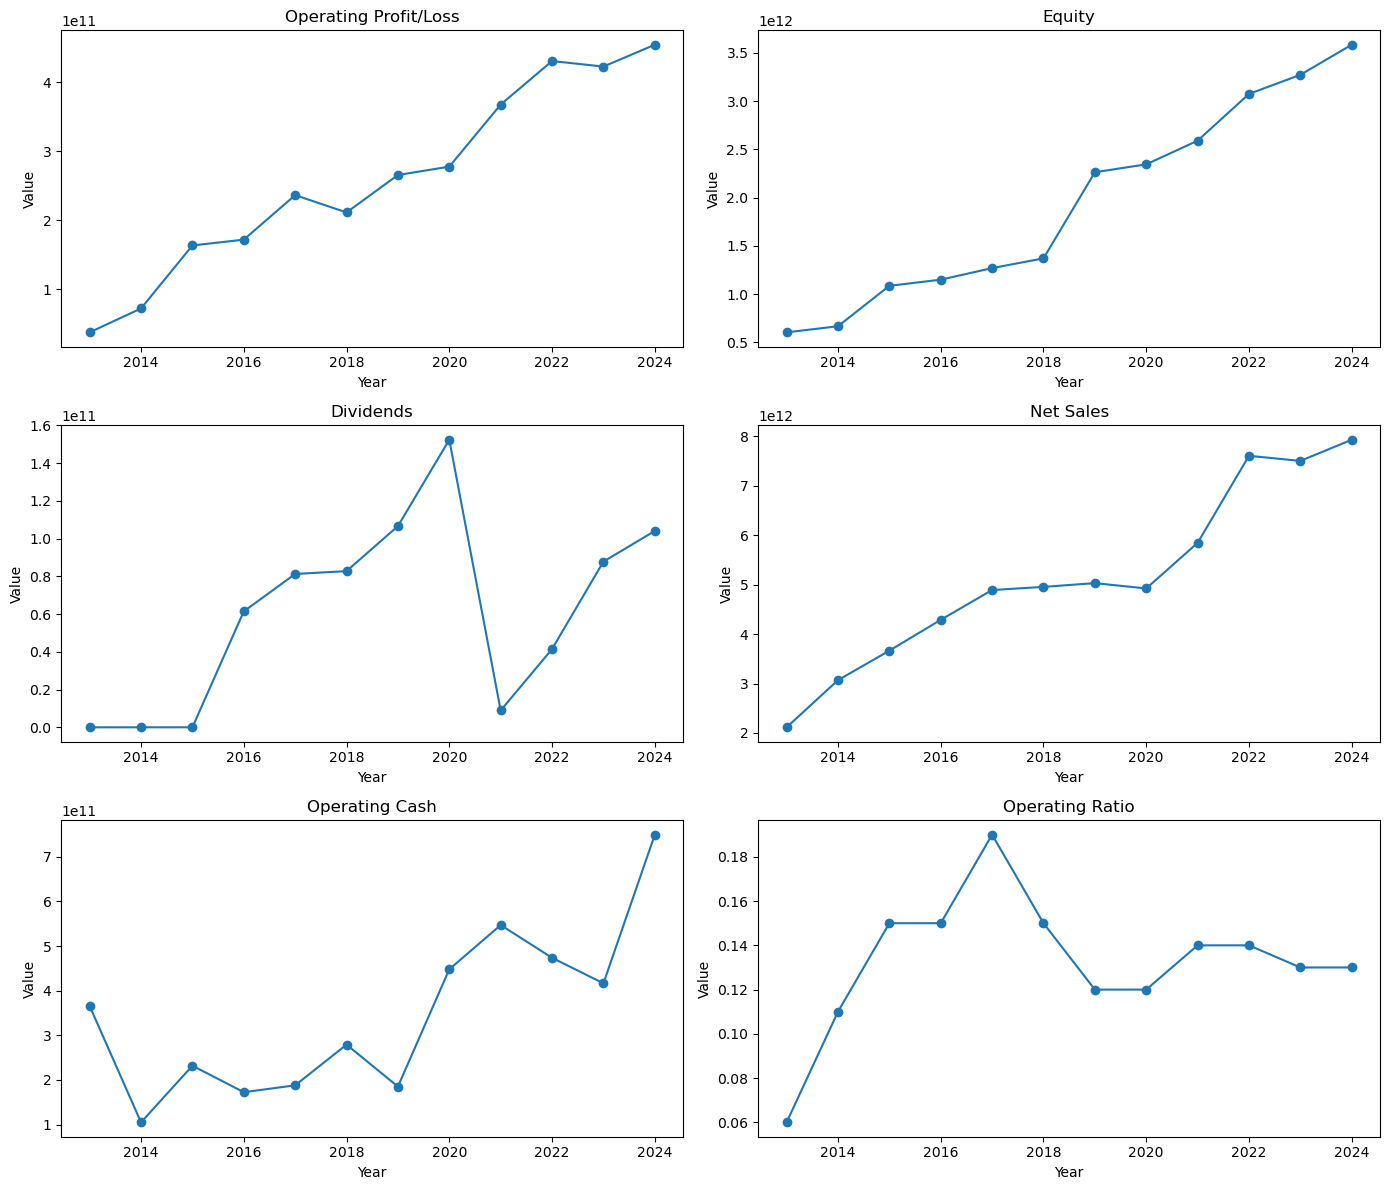

In [38]:
# Create DataFrame

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 columns of subplots

# Plot Operating Profit/Loss
axs[0, 0].plot(growth_numbers['yearReport'], growth_numbers['Operating Profit/Loss'], marker='o')
axs[0, 0].set_title('Operating Profit/Loss')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Value')

# Plot Equity
axs[0, 1].plot(growth_numbers['yearReport'], growth_numbers['Equity'], marker='o')
axs[0, 1].set_title('Equity')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')

# Plot Dividend
axs[1, 0].plot(growth_numbers['yearReport'], growth_numbers['Dividends paid'], marker='o')
axs[1, 0].set_title('Dividends')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')

# Plot Net Sales
axs[1, 1].plot(growth_numbers['yearReport'], growth_numbers['Net Sales'], marker='o')
axs[1, 1].set_title('Net Sales')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Value')

# Plot Gross Profit
axs[2, 0].plot(growth_numbers['yearReport'], growth_numbers['Operating Cash'], marker='o')
axs[2, 0].set_title('Operating Cash')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Value')


# Plot Operating Ratio
axs[2, 1].plot(growth_numbers['yearReport'], growth_numbers['Operating Ratio'], marker='o')
axs[2, 1].set_title('Operating Ratio')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Value')

# Hide the last subplot (bottom-right corner) if not needed
# fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [39]:
growth_numbers.tail()

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities,Equity,Operating Ratio,Operating Cash
7,2017,236387958786,4891800394110,754608898623,1269410030290,1851567144688,81288720410,187817414374,1269410030290,0.19,187817414374
8,2016,172001951859,4288751296098,572510103038,1149457254620,1332763127858,61460636040,172445867246,1149457254620,0.15,172445867246
9,2015,163574519424,3664842077171,585117404414,1085814175991,1032651465216,18613000,231820970138,1085814175991,0.15,231820970138
10,2014,72472329922,3068090400074,493105246417,666603481155,1032540874492,20236800,104865034663,666603481155,0.11,104865034663
11,2013,37866660385,2113376582304,293373229182,603405189583,1012609282689,0,365448025541,603405189583,0.06,365448025541


In [40]:
growth_rate

,yearReport,Operating Profit/Loss Growth Rate (%),Net Sales Growth Rate (%),Gross Profit Growth Rate (%),OWNER'S EQUITY(Bn.VND) Growth Rate (%),LIABILITIES (Bn. VND) Growth Rate (%),Dividends paid Growth Rate (%),Net cash inflows/outflows from operating activities Growth Rate (%),Equity Growth Rate (%),Operating Ratio Growth Rate (%),Operating Cash Growth Rate (%)
0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,91.388227,45.174808,68.081201,10.473608,1.968340,inf,-71.305076,10.473608,83.333333,-71.305076
2,2015,125.706169,19.450264,18.659740,62.887565,0.010711,-8.023996e+00,121.066031,62.887565,36.363636,121.066031
3,2016,5.152045,17.024177,-2.154662,5.861323,29.062241,3.301027e+05,-25.612481,5.861323,0.000000,-25.612481
4,2017,37.433300,14.061181,31.807089,10.435601,38.926949,3.226144e+01,8.913839,10.435601,26.666667,8.913839
5,2018,-10.594427,1.304996,4.504489,7.963030,20.061339,1.854906e+00,48.585891,7.963030,-21.052632,48.585891
6,2019,25.638285,1.536509,16.115691,65.139171,10.710345,2.879863e+01,-33.722569,65.139171,-20.000000,-33.722569
7,2020,4.559185,-2.144029,1.056103,3.620681,11.990053,4.294633e+01,142.159572,3.620681,0.000000,142.159572
8,2021,32.346542,18.729768,11.949220,10.456092,23.568939,-9.414196e+01,22.152457,10.456092,16.666667,22.152457
9,2022,17.143865,30.146077,36.995819,18.733546,12.957423,3.645459e+02,-13.429322,18.733546,0.000000,-13.429322


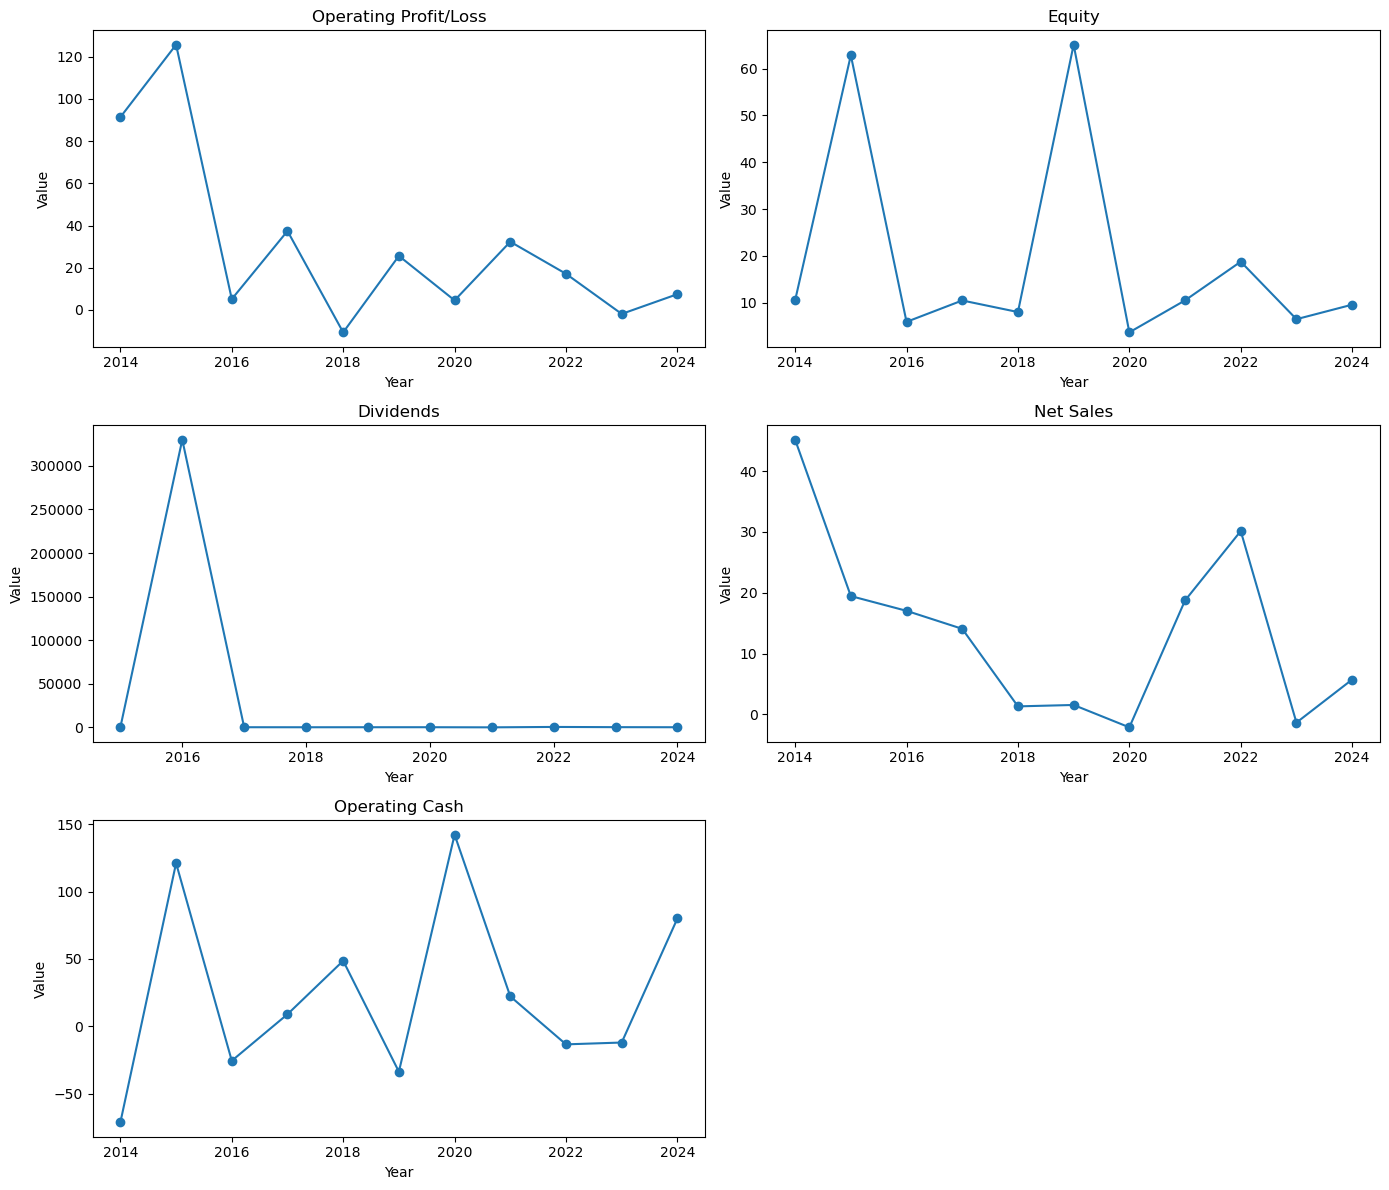

In [41]:
# Plot the Growth Rate of each number
# growth_rate = growth_rate[growth_rate['yearReport'] >= 2015]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 columns of subplots

# Plot Operating Profit/Loss
axs[0, 0].plot(growth_rate['yearReport'], growth_rate['Operating Profit/Loss Growth Rate (%)'], marker='o')
axs[0, 0].set_title('Operating Profit/Loss')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Value')

# Plot Equity
axs[0, 1].plot(growth_rate['yearReport'], growth_rate['Equity Growth Rate (%)'], marker='o')
axs[0, 1].set_title('Equity')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')

# Plot Dividend
axs[1, 0].plot(growth_rate['yearReport'], growth_rate['Dividends paid Growth Rate (%)'], marker='o')
axs[1, 0].set_title('Dividends')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')

# Plot Net Sales
axs[1, 1].plot(growth_rate['yearReport'], growth_rate['Net Sales Growth Rate (%)'], marker='o')
axs[1, 1].set_title('Net Sales')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Value')

# Plot Gross Profit
axs[2, 0].plot(growth_rate['yearReport'], growth_rate['Operating Cash Growth Rate (%)'], marker='o')
axs[2, 0].set_title('Operating Cash')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Value')



# Hide the last subplot (bottom-right corner) if not needed
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Management Numbers

In [42]:
growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities,Equity,Operating Ratio,Operating Cash
0,2024,454060289357,7933915558118,1447045635653,3585717323463,4134017543403,104073874465,749571192729,3585717323463,0.13,749571192729
1,2023,422416539562,7504763292833,1377473903761,3273529578105,4005504851395,87843402870,416452211963,3273529578105,0.13,416452211963
2,2022,430433711790,7608514143508,1419184020473,3075648115856,3847108147561,41483663847,473645877527,3075648115856,0.14,473645877527
3,2021,367440250972,5846134066344,1035932358997,2590378390343,3405803737103,8929938421,547120443390,2590378390343,0.14,547120443390
4,2020,277634946955,4923899154586,925359159819,2345165701289,2756197285455,152439138034,447899663336,2345165701289,0.12,447899663336
5,2019,265528989849,5031782014471,915688541116,2263221654419,2461109004436,106640821728,184960544466,2263221654419,0.12,184960544466
6,2018,211344009819,4955638202838,788600173393,1370493528595,2223016298653,82796549828,279070178714,1370493528595,0.15,279070178714
7,2017,236387958786,4891800394110,754608898623,1269410030290,1851567144688,81288720410,187817414374,1269410030290,0.19,187817414374
8,2016,172001951859,4288751296098,572510103038,1149457254620,1332763127858,61460636040,172445867246,1149457254620,0.15,172445867246
9,2015,163574519424,3664842077171,585117404414,1085814175991,1032651465216,18613000,231820970138,1085814175991,0.15,231820970138


In [43]:
management_numbers = growth_numbers[['yearReport']].copy()
management_numbers['ROE'] = (growth_numbers['Operating Profit/Loss'] / growth_numbers['Equity']).round(2)
management_numbers['ROIC'] = (growth_numbers['Operating Profit/Loss'] / growth_numbers['LIABILITIES (Bn. VND)']).round(2)

management_numbers

,yearReport,ROE,ROIC
0,2024,0.13,0.11
1,2023,0.13,0.11
2,2022,0.14,0.11
3,2021,0.14,0.11
4,2020,0.12,0.10
5,2019,0.12,0.11
6,2018,0.15,0.10
7,2017,0.19,0.13
8,2016,0.15,0.13
9,2015,0.15,0.16


Calculate the CAGR of the 4 numbers

In [44]:
#List of financial metrics to calculate the CAGR
metrics = ['Operating Profit/Loss','Equity','Net Sales','Operating Cash']

#Calculate the CAGR for each metrics
CAGRS = {}

for metric in metrics:
    #Find the first and last non-null values:
    first_non_null = growth_numbers[metric].loc[growth_numbers[metric] > 0].first_valid_index()
    last_non_null = growth_numbers[metric].last_valid_index()

    if first_non_null is not None and last_non_null is not None:
        #Calculate the number of years in which the value is not null
        num_years = int(last_non_null) - int(first_non_null) + 1
        initial_value = growth_numbers[metric][first_non_null]
        lastest_value = growth_numbers[metric][last_non_null]
    print(initial_value)
    print(lastest_value)


454060289357
37866660385
3585717323463
603405189583
7933915558118
2113376582304
749571192729
365448025541


In [45]:
#List of financial metrics to calculate the CAGR
metrics = ['Operating Profit/Loss','Equity','Net Sales','Operating Cash']

#Calculate the CAGR for each metrics
CAGRS = {}

for metric in metrics:
    #Find the first and last non-null values:
    first_non_null = growth_numbers[metric].loc[growth_numbers[metric] > 0].first_valid_index()
    last_non_null = growth_numbers[metric].last_valid_index()

    if first_non_null is not None and last_non_null is not None:
        #Calculate the number of years in which the value is not null
        num_years = abs(int(last_non_null) - int(first_non_null) + 1)
        initial_value = growth_numbers[metric][last_non_null]
        lastest_value = growth_numbers[metric][first_non_null]
        
        
        CAGR = (((lastest_value/initial_value) ** (1/num_years)) - 1) * 100

        #Store the CAGR and the num_years in the CAGRS dictionary
        CAGRS[metric] = {'cagr': CAGR, 'num_years': num_years}

#Print CAGR for each metric
for metric, values in CAGRS.items():
    cagr = values['cagr']
    num_years = values['num_years']
    print(f'CAGR of {metric}: {cagr: .2f}% over {num_years} years.')


# for metric in metrics:
#     initial_value = full_df[metric].dropna().loc[full_df[metric] > 0].iloc[0] #Find the first non null value
#     lastest_value = full_df[metric].iloc[-1]

#     lastest_year = int(full_df[metric].last_valid_index())
#     first_year = int(full_df[metric].first_valid_index())
#     print (f'{metric}: {first_year}, {lastest_year}')



CAGR of Operating Profit/Loss:  23.00% over 12 years.
CAGR of Equity:  16.01% over 12 years.
CAGR of Net Sales:  11.65% over 12 years.
CAGR of Operating Cash:  6.17% over 12 years.


In [46]:
CAGR = (((1006891945310/76356700441) ** (1/11)) - 1) * 100
CAGR

26.424288864627464

# Long Term Results
"In measuring **long term** economic performance - in contrast to yearly performance - we believe it is appropriate to **recognize** fully any realized capital gains or losses as well as extraordinary items, and also to utilize financial statements presenting equity securities **at market value**.  Such capital gains or losses, either realized or unrealized, are fully as important to shareholders over a period of years as earnings realized in a more routine manner through operations; it is just that their impact is often extremely capricious in the short run, a characteristic that makes them inappropriate as an indicator of single year managerial performance."  (BVPS)

-- Berkshire Letters 1979

## Evaluation

### Ten Cap

The Ten Cap Method is a stock valuation strategy used to assess the attractiveness of a company's stock based on its cash flow yield. 
The method compares the company's Free Cash Flow (FCF) to its Market Capitalization, calculating the 'Ten Cap Rate.' 
If this rate is at least 10%, the stock is considered a good investment (hence "Ten Cap"). 


In [47]:
CashFlow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 36 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   ticker                                                                   12 non-null     object
 1   yearReport                                                               12 non-null     int64 
 2   Net Profit/Loss before tax                                               12 non-null     int64 
 3   Depreciation and Amortisation                                            12 non-null     int64 
 4   Provision for credit losses                                              12 non-null     int64 
 5   Unrealized foreign exchange gain/loss                                    12 non-null     int64 
 6   Profit/Loss from investing activities                                    12 non-null

In [48]:
# Get the column names and their non-null counts
column_info = CashFlow.isnull().sum().reset_index()
column_info.columns = ['Column', 'Null_Count']
column_info['Non_Null_Count'] = len(CashFlow) - column_info['Null_Count']

# Create a dictionary to store the column with the highest non-null count for each name
columns_to_keep = {}

for _, row in column_info.iterrows():
    col_name = row['Column']
    non_null_count = row['Non_Null_Count']
    
    if col_name not in columns_to_keep or non_null_count > columns_to_keep[col_name][1]:
        columns_to_keep[col_name] = (_, non_null_count)

# Get the indices of columns to keep
columns_to_keep_indices = [idx for idx, _ in columns_to_keep.values()]

# Keep only the columns with the highest non-null count for each name
CashFlow = CashFlow.iloc[:, columns_to_keep_indices]

# Reset the column names (optional, to remove any suffixes added by pandas for duplicate names)
CashFlow.columns = [col.split('.')[0] for col in CashFlow.columns]

In [49]:
ten_cap_numbers = growth_numbers[['yearReport','Operating Profit/Loss']]
ten_cap_numbers = pd.merge(ten_cap_numbers, 
                           CashFlow[['yearReport','Depreciation and Amortisation','Increase/Decrease in receivables','Increase/Decrease in payables',
                                     'Business Income Tax paid','Purchase of fixed assets']],
                                     how='inner', on='yearReport')

ten_cap_numbers

,yearReport,Operating Profit/Loss,Depreciation and Amortisation,Increase/Decrease in receivables,Increase/Decrease in payables,Business Income Tax paid,Purchase of fixed assets
0,2024,454060289357,473447536983,-128968119753,130399756808,-57398997689,-547279531437
1,2023,422416539562,364769096026,-95684347174,6117393319,-106693020733,-865466700283
2,2022,430433711790,297893669960,-160272092687,-83153351507,23973518551,-550777666538
3,2021,367440250972,234910248673,-202050007039,651395579939,-28307967294,-610178311180
4,2020,277634946955,214620874253,-22318054002,73640611182,-58226851065,-464324213798
5,2019,265528989849,179946650076,91087132872,-82206995270,-41571978116,-438181728954
6,2018,211344009819,157331615399,-282788894767,281899644026,-40496170994,-362855500089
7,2017,236387958786,126147917091,-314036261263,195168927069,-31372393349,-261281976202
8,2016,172001951859,90814080596,-258468947289,283412911846,-29191241974,-159952248943
9,2015,163574519424,0,0,0,0,-119745826854


In [50]:
ten_cap_numbers['Owner Earnings'] = (
    ten_cap_numbers['Operating Profit/Loss'] +
    ten_cap_numbers['Depreciation and Amortisation'] +
    ten_cap_numbers['Increase/Decrease in receivables'] +
    ten_cap_numbers['Increase/Decrease in payables'] +
    # ten_cap_numbers['Business Income Tax paid'] +
    ten_cap_numbers['Purchase of fixed assets']
)

ten_cap_numbers

,yearReport,Operating Profit/Loss,Depreciation and Amortisation,Increase/Decrease in receivables,Increase/Decrease in payables,Business Income Tax paid,Purchase of fixed assets,Owner Earnings
0,2024,454060289357,473447536983,-128968119753,130399756808,-57398997689,-547279531437,381659931958
1,2023,422416539562,364769096026,-95684347174,6117393319,-106693020733,-865466700283,-167848018550
2,2022,430433711790,297893669960,-160272092687,-83153351507,23973518551,-550777666538,-65875728982
3,2021,367440250972,234910248673,-202050007039,651395579939,-28307967294,-610178311180,441517761365
4,2020,277634946955,214620874253,-22318054002,73640611182,-58226851065,-464324213798,79254164590
5,2019,265528989849,179946650076,91087132872,-82206995270,-41571978116,-438181728954,16174048573
6,2018,211344009819,157331615399,-282788894767,281899644026,-40496170994,-362855500089,4930874388
7,2017,236387958786,126147917091,-314036261263,195168927069,-31372393349,-261281976202,-17613434519
8,2016,172001951859,90814080596,-258468947289,283412911846,-29191241974,-159952248943,127807748069
9,2015,163574519424,0,0,0,0,-119745826854,43828692570


In [51]:
# Get the column names and their non-null counts
column_info = BalanceSheet.isnull().sum().reset_index()
column_info.columns = ['Column', 'Null_Count']
column_info['Non_Null_Count'] = len(BalanceSheet) - column_info['Null_Count']

# Create a dictionary to store the column with the highest non-null count for each name
columns_to_keep = {}

for _, row in column_info.iterrows():
    col_name = row['Column']
    non_null_count = row['Non_Null_Count']
    
    if col_name not in columns_to_keep or non_null_count > columns_to_keep[col_name][1]:
        columns_to_keep[col_name] = (_, non_null_count)

# Get the indices of columns to keep
columns_to_keep_indices = [idx for idx, _ in columns_to_keep.values()]

# Keep only the columns with the highest non-null count for each name
BalanceSheet = BalanceSheet.iloc[:, columns_to_keep_indices]

# Reset the column names (optional, to remove any suffixes added by pandas for duplicate names)
BalanceSheet.columns = [col.split('.')[0] for col in BalanceSheet.columns]

In [52]:
BalanceSheet[['yearReport','Common shares (Bn']]

,yearReport,Common shares (Bn
0,2024,1903974960000
1,2023,1900269960000
2,2022,1500014320000
3,2021,999998660000
4,2020,999998660000
5,2019,999998660000
6,2018,720552100000
7,2017,673419530000
8,2016,673419530000
9,2015,673419530000


In [53]:
ten_cap_numbers['Whole business price'] = ten_cap_numbers['Owner Earnings'] * 10
ten_cap_numbers = pd.merge(ten_cap_numbers,
                           BalanceSheet[['yearReport','Common shares (Bn']],
                           how='inner', on='yearReport')

face_value = 10000

ten_cap_numbers['Common Shares'] = ten_cap_numbers['Common shares (Bn'] / face_value

ten_cap_numbers


,yearReport,Operating Profit/Loss,Depreciation and Amortisation,Increase/Decrease in receivables,Increase/Decrease in payables,Business Income Tax paid,Purchase of fixed assets,Owner Earnings,Whole business price,Common shares (Bn,Common Shares
0,2024,454060289357,473447536983,-128968119753,130399756808,-57398997689,-547279531437,381659931958,3816599319580,1903974960000,190397496.0
1,2023,422416539562,364769096026,-95684347174,6117393319,-106693020733,-865466700283,-167848018550,-1678480185500,1900269960000,190026996.0
2,2022,430433711790,297893669960,-160272092687,-83153351507,23973518551,-550777666538,-65875728982,-658757289820,1500014320000,150001432.0
3,2021,367440250972,234910248673,-202050007039,651395579939,-28307967294,-610178311180,441517761365,4415177613650,999998660000,99999866.0
4,2020,277634946955,214620874253,-22318054002,73640611182,-58226851065,-464324213798,79254164590,792541645900,999998660000,99999866.0
5,2019,265528989849,179946650076,91087132872,-82206995270,-41571978116,-438181728954,16174048573,161740485730,999998660000,99999866.0
6,2018,211344009819,157331615399,-282788894767,281899644026,-40496170994,-362855500089,4930874388,49308743880,720552100000,72055210.0
7,2017,236387958786,126147917091,-314036261263,195168927069,-31372393349,-261281976202,-17613434519,-176134345190,673419530000,67341953.0
8,2016,172001951859,90814080596,-258468947289,283412911846,-29191241974,-159952248943,127807748069,1278077480690,673419530000,67341953.0
9,2015,163574519424,0,0,0,0,-119745826854,43828692570,438286925700,673419530000,67341953.0


In [54]:
ten_cap_numbers['Stock Price'] = ten_cap_numbers['Whole business price'] / ten_cap_numbers['Common Shares']
ten_cap_numbers['Stock Price'].round(0)

ten_cap_numbers[['yearReport','Stock Price']]

,yearReport,Stock Price
0,2024,20045.428116
1,2023,-8832.851231
2,2022,-4391.673340
3,2021,44151.835300
4,2020,7925.427079
5,2019,1617.407025
6,2018,684.318925
7,2017,-2615.521786
8,2016,18978.919140
9,2015,6508.378599
